In [1]:
import requests as req
import json
import pandas as pd
import time
import os


In [2]:
# Get the API key from the environment
BLS_API_KEY = os.environ.get('BLS_API_KEY')
user_email = 'franktsibu@gmail.com'
print(BLS_API_KEY)

77fcc0e0e450426db6aff0c8303e6054


In [ ]:
headers = {'Content-type':'application/json'}
data = json.dumps({
    'user-id': user_email,
    'api-key': BLS_API_KEY,
    'seriesid':['LNS14000000'], 
    'startyear':'2014', 
    'endyear':'2024'}
    )
resp = req.post(url='https://api.bls.gov/publicAPI/v2/timeseries/data/',data=data, headers=headers)
json_data = json.loads(resp.text)
print(json_data)

{"user-id": "franktsibu@gmail.com", "api-key": "77fcc0e0e450426db6aff0c8303e6054", "seriesid": ["LNS14000000"], "startyear": "2014", "endyear": "2024"}
{'status': 'REQUEST_NOT_PROCESSED', 'responseTime': 0, 'message': ['Request could not be serviced, as the daily threshold for total number of requests allocated to the user with registration key  has been reached.'], 'Results': {}}


In [ ]:
unemp_national_dataset = []
for series in json_data['Results']['series']:
    for entry in series['data']:
        unemp_national_dataset.append(
            {
            'year': entry['year'],
            'month': entry['periodName'],
            'value': entry['value']
            }
        )
print(unemp_national_dataset)

[{'year': '2023', 'month': 'December', 'value': '3.8'}, {'year': '2023', 'month': 'November', 'value': '3.7'}, {'year': '2023', 'month': 'October', 'value': '3.9'}, {'year': '2023', 'month': 'September', 'value': '3.8'}, {'year': '2023', 'month': 'August', 'value': '3.7'}, {'year': '2023', 'month': 'July', 'value': '3.5'}, {'year': '2023', 'month': 'June', 'value': '3.6'}, {'year': '2023', 'month': 'May', 'value': '3.6'}, {'year': '2023', 'month': 'April', 'value': '3.4'}, {'year': '2023', 'month': 'March', 'value': '3.5'}, {'year': '2023', 'month': 'February', 'value': '3.6'}, {'year': '2023', 'month': 'January', 'value': '3.5'}, {'year': '2022', 'month': 'December', 'value': '3.5'}, {'year': '2022', 'month': 'November', 'value': '3.6'}, {'year': '2022', 'month': 'October', 'value': '3.6'}, {'year': '2022', 'month': 'September', 'value': '3.5'}, {'year': '2022', 'month': 'August', 'value': '3.6'}, {'year': '2022', 'month': 'July', 'value': '3.5'}, {'year': '2022', 'month': 'June', 'va

In [ ]:
unemp_df = pd.DataFrame(unemp_national_dataset)
unemp_df['value'] = pd.to_numeric(unemp_df['value'])
print(unemp_df)

     year      month  value
0    2023   December    3.8
1    2023   November    3.7
2    2023    October    3.9
3    2023  September    3.8
4    2023     August    3.7
..    ...        ...    ...
115  2014        May    6.3
116  2014      April    6.2
117  2014      March    6.7
118  2014   February    6.7
119  2014    January    6.6

[120 rows x 3 columns]


<Axes: xlabel='month'>

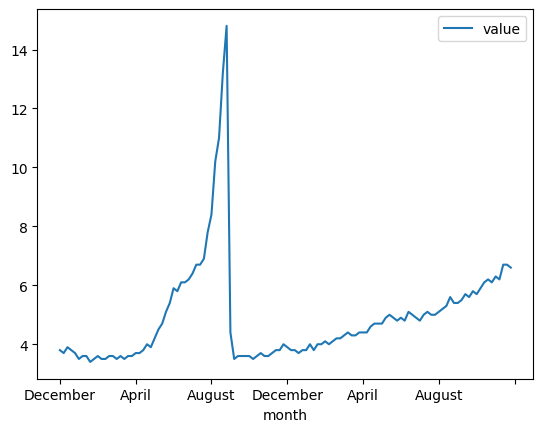

In [86]:
#plot the data
unemp_df.plot(x='month', y='value', kind='line')

In [ ]:
#fetch data for a all 50 states wait for 5 seconds between each request
headers = {'Content-type':'application/json'}
state_code = ['1', '2','4','5','6','8','9','10','11','12','13','15','16','17',
               '18','19','20','21','22','23','24','25','26','27','28','29','30',
               '31','32','33','34','35','36','37','38','39','40','41','42','44',
               '45','46','47','48','49','50']
for state_cd in state_code:
    if len(state_cd) > 1:
        series_id = f'LASST{state_cd}0000000000003'
    else:
        series_id = f'LASST0{state_cd}0000000000003'
    print(series_id)
    data = json.dumps({
        'user-id': user_email,
        'api-key': BLS_API_KEY,
        'seriesid':[series_id], 
        'startyear':'2014', 
        'endyear':'2024'
        })
    print(data)
    resp = req.post(url='https://api.bls.gov/publicAPI/v2/timeseries/data/',data=data, headers=headers)
    json_data = json.loads(resp.text)
    print(json_data)

    unemp_state_dataset = []
    for series in json_data['Results']['series']:
        for entry in series['data']:
            unemp_state_dataset.append(
                {
                'year': entry['year'],
                'month': entry['periodName'],
                'value': entry['value']
                }
            )
    print(unemp_state_dataset)

    # unemp_df = pd.DataFrame(unemp_state_dataset)
    # unemp_df['value'] = pd.to_numeric(unemp_df['value'])
    # print(unemp_df)

    # plot the data
    # unemp_df.plot(x='month', y='value', kind='line')


LASST010000000000003
{"user-id": "franktsibu@gmail.com", "api-key": "77fcc0e0e450426db6aff0c8303e6054", "seriesid": ["LASST010000000000003"], "startyear": "2014", "endyear": "2024"}
{'status': 'REQUEST_NOT_PROCESSED', 'responseTime': 0, 'message': ['Request could not be serviced, as the daily threshold for total number of requests allocated to the user with registration key  has been reached.'], 'Results': {}}


KeyError: 'series'